<a href="https://colab.research.google.com/github/RAFS20/causal-inference/blob/main/Causal_Inference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Cuaderno de: Ricardo Alonzo Fernández Salguero

"Statistics and Causal Inference" por Paul W. Holland, profundiza en la diferencia entre inferencia asociativa e inferencia causal y presenta un modelo detallado para la inferencia causal basado en el trabajo de Rubin.

La inferencia causal a menudo se contrasta con la inferencia asociativa. Mientras que la inferencia asociativa se centra en descubrir cómo los valores de una variable están asociados con los valores de otra, la inferencia causal busca medir el efecto de las causas.

### 1. Modelos de Inferencia

La **Inferencia Asociativa** se describe con variables $A$ y $Y$, donde $A$ es un atributo de las unidades en un universo $U$ y $Y$ es la variable de respuesta. La relación entre estas dos variables se modela utilizando probabilidades y expectativas calculadas sobre el universo $U$.

La relación puede ser expresada como:
$$
\text{Pr}(Y = y \,|\, A = a) = \frac{\text{Pr}(Y = y \,\&\, A = a)}{\text{Pr}(A = a)}
$$

Donde:
- $\text{Pr}(Y = y \,|\, A = a)$ representa la probabilidad condicional de $Y$ dado $A$.
- $\text{E}(Y \,|\, A=a)$ representa la expectativa de $Y$ dado $A=a$, también conocido como la regresión de $Y$ en $A$.

En la **Inferencia Causal** basada en el modelo de Rubin, introducimos la idea de dos variables potenciales de respuesta $Y_t$ y $Y_c$, donde $t$ indica el tratamiento y $c$ el control. La diferencia $Y_t(u) - Y_c(u)$ representa el efecto causal del tratamiento sobre la unidad $u$.

La **Diferencia Causal** se define como:
$$
\tau = Y_t(u) - Y_c(u)
$$

Sin embargo, enfrentamos el **Problema Fundamental de la Inferencia Causal**: es imposible observar ambos $Y_t(u)$ y $Y_c(u)$ en la misma unidad. Por lo tanto, necesitamos métodos para estimar el efecto causal promedio a través de una población.

### 2. Estimación del Efecto Causal

La **Solución Estadística** al problema fundamental implica el uso de la expectativa sobre el universo de unidades $U$ para definir el efecto causal promedio ($\tau$) como:
$$
\tau = \text{E}(Y_t - Y_c)
$$

La **Independencia** es crucial para la inferencia causal en experimentos aleatorizados. Si las unidades son asignadas al azar a tratamientos, podemos asumir que:
$$
\text{E}(Y_t) = \text{E}(Y_t \,|\, S = t) \quad \text{y} \quad \text{E}(Y_c) = \text{E}(Y_c \,|\, S = c)
$$

Esto permite estimar el efecto causal promedio ($\tau$) como la diferencia entre las medias observadas de las respuestas para cada grupo de tratamiento.

### 3. Aplicación a Estudios No Aleatorizados

En situaciones donde no es posible realizar un experimento aleatorizado, se pueden emplear técnicas de **ignorabilidad fuerte** para ajustar por las variables de confusión y estimar el efecto causal mediante el modelado de la asignación del tratamiento como si fuera aleatoria, dado un conjunto de covariables pre-tratamiento.

La inferencia causal es una parte fundamental de la estadística que permite ir más allá de las asociaciones para identificar relaciones de causa y efecto. El modelo de Rubin proporciona un marco teórico para abordar estos problemas, aunque la aplicación práctica requiere cuidadosa consideración de los supuestos y la estructura de los datos.

In [1]:
import numpy as np

# Parámetros de simulación
n_units = 1000  # Número de unidades (ej., personas) en cada grupo
true_effect = 5  # Efecto verdadero del tratamiento
np.random.seed(42)  # Semilla para reproducibilidad

# Generar datos simulados
control_group = np.random.normal(50, 10, n_units)  # Grupo control con media 50 y desviación estándar 10
treatment_group = control_group + true_effect + np.random.normal(0, 1, n_units)  # Grupo tratamiento con efecto causal

# Cálculo del efecto causal promedio
estimated_effect = treatment_group.mean() - control_group.mean()

print(f"Verdadero efecto del tratamiento: {true_effect}")
print(f"Efecto causal promedio estimado: {estimated_effect}")

Verdadero efecto del tratamiento: 5
Efecto causal promedio estimado: 5.0708362372491464


In [2]:
import numpy as np
from scipy import stats

# 1. Generar datos simulados
np.random.seed(42)  # Para reproducibilidad

# Tamaño de la muestra
n = 1000

# Variable de tratamiento (binaria: 0 o 1)
treatment = np.random.randint(2, size=n)

# Covariables (variables que podrían afectar tanto al tratamiento como a la respuesta)
covariate_1 = np.random.normal(0, 1, n)
covariate_2 = np.random.normal(0, 1, n)

# Efecto causal del tratamiento
effect = 2.0

# Variable de respuesta potencial para el tratamiento
response_treatment = 3 + effect * treatment + 0.5 * covariate_1 + np.random.normal(0, 1, n)

# Variable de respuesta potencial para el control
response_control = 3 + 0.5 * covariate_1 + np.random.normal(0, 1, n)

# 2. Calcular el efecto causal promedio
tau = np.mean(response_treatment - response_control)

# 3. Prueba de hipótesis para la significancia del efecto causal
# Usando t-test de muestras independientes
t_stat, p_value = stats.ttest_ind(response_treatment, response_control)

print("Efecto causal promedio estimado (tau):", tau)
print("Estadística t:", t_stat)
print("Valor p:", p_value)

Efecto causal promedio estimado (tau): 1.0698260383475064
Estadística t: 17.995378322480853
Valor p: 3.218348525231323e-67


El resultado obtenido muestra un efecto causal promedio estimado (τ) de aproximadamente 1.07, lo que indica que, en promedio, el tratamiento tiene un efecto positivo en la variable de respuesta en comparación con el grupo de control. La estadística t es significativamente alta, con un valor de aproximadamente 18, lo que sugiere que existe una diferencia significativa entre los grupos de tratamiento y control en términos de respuesta. Además, el valor p es extremadamente bajo (aproximadamente 3.22e-67), lo que indica una fuerte evidencia en contra de la hipótesis nula de que no hay diferencia entre los grupos. En resumen, estos resultados sugieren que el tratamiento tiene un efecto causal significativo en la variable de respuesta.

Rohrer, J. M. (2018). Thinking Clearly About Correlations and Causation: Graphical Causal Models for Observational Data. Advances in Methods and Practices in Psychological Science, 1(1), 27–42. doi:10.1177/2515245917745629

### Modelos Dirigidos Acíclicos (DAGs)

Los Modelos Dirigidos Acíclicos (DAGs, por sus siglas en inglés) son una herramienta fundamental en la inferencia causal basada en datos observacionales. Un DAG se compone de nodos (variables) y flechas (relaciones causales entre variables). La relación causal entre dos variables $A$ y $B$ se puede representar como $A \rightarrow B$, indicando que $A$ tiene un efecto causal sobre $B$.

### Confusión y Caminos de Espalda

La confusión ocurre cuando una tercera variable, $C$, influye tanto en la variable independiente $A$ como en la variable dependiente $B$. Esto puede crear una asociación espuria entre $A$ y $B$ que no refleja una relación causal directa. Matemáticamente, esto se representa identificando y controlando estadísticamente por $C$ para aislar el efecto de $A$ sobre $B$.

### Control Estadístico

Para controlar una variable de confusión $C$ en un modelo lineal, se puede utilizar una regresión lineal múltiple. Si queremos estimar el efecto de $A$ sobre $B$, controlando por $C$, la fórmula sería:

$$
B = \beta_0 + \beta_1 A + \beta_2 C + \epsilon
$$

donde $\beta_0$ es el intercepto, $\beta_1$ es el coeficiente para la variable independiente $A$, $\beta_2$ es el coeficiente para la variable de confusión $C$, y $\epsilon$ es el término de error.

### Sesgo de Selección

El sesgo de selección puede introducirse cuando la muestra no es representativa de la población. Supongamos que solo observamos un subconjunto de la población basado en alguna característica $S$. Si $S$ está asociada tanto con $A$ como con $B$, esto puede introducir una asociación espuria entre $A$ y $B$ en nuestra muestra. El análisis debe ser consciente de este sesgo potencial.

### Efectos Directos e Indirectos (Mediación)

En un contexto donde $A$ afecta a $C$, y $C$ a su vez afecta a $B$, $C$ actúa como un mediador en el camino de $A$ a $B$. La relación total de $A$ a $B$ se descompone en efecto directo (independiente de $C$) y efecto indirecto (a través de $C$). Esto se puede explorar a través de modelos de mediación.

In [7]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Simulando datos
np.random.seed(42) # Para reproducibilidad
n = 500 # Número de observaciones

# Generando variables
A = np.random.normal(0, 1, n) # Variable independiente
C = np.random.normal(2, 1, n) + 0.5*A # Variable de confusión, influenciada por A
B = 0.5*A + 0.3*C + np.random.normal(0, 1, n) # Variable dependiente, influenciada por A y C

# Creando un DataFrame
data = pd.DataFrame({'A': A, 'B': B, 'C': C})

# Modelo de regresión lineal para estimar el efecto de A sobre B controlando por C
model = smf.ols('B ~ A + C', data=data).fit()

# Mostrando resultados
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      B   R-squared:                       0.305
Model:                            OLS   Adj. R-squared:                  0.302
Method:                 Least Squares   F-statistic:                     109.0
Date:                Sat, 16 Mar 2024   Prob (F-statistic):           5.62e-40
Time:                        22:08:29   Log-Likelihood:                -711.93
No. Observations:                 500   AIC:                             1430.
Df Residuals:                     497   BIC:                             1443.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0424      0.104     -0.407      0.6


El análisis de los datos simulados, utilizando un modelo de regresión lineal para estimar el efecto de $A$ sobre $B$, controlando por $C$, nos proporciona los siguientes resultados:

El coeficiente para $A$ es aproximadamente $0.409$, con un $p$-valor muy cercano a cero. Esto sugiere que hay una relación causal significativa de $A$ sobre $B$, incluso después de controlar por $C$.
El coeficiente para $C$ es aproximadamente $0.375$, también con un $p$-valor muy cercano a cero, indicando que $C$ tiene una influencia significativa en $B$.
El $R^2$ ajustado del modelo es de $0.302$, lo que significa que aproximadamente el 30.2% de la variabilidad en $B$ se puede explicar por las variables $A$ y $C$ en este modelo.
Este análisis simula cómo se pueden aplicar los conceptos de Modelos Dirigidos Acíclicos (DAGs), confusión, y control estadístico en un contexto de inferencia causal, utilizando datos generados bajo suposiciones específicas acerca de las relaciones causales entre las variables.

Los Modelos Dirigidos Acíclicos (DAGs) son fundamentales en varias áreas como la teoría de grafos, la estadística, la investigación de operaciones y más. Los DAGs se utilizan para modelar relaciones entre variables o eventos donde hay una dirección implícita y no hay ciclos, es decir, no es posible volver a un nodo inicial siguiendo las direcciones de las aristas.

### 1. Definición de un Grafo Dirigido

Un grafo dirigido $G$ se define como un par ordenado $(V, E)$ donde:

- $V$ es un conjunto de nodos o vértices.
- $E \subseteq \{(u, v) | u, v \in V \text{ y } u \neq v\}$ es un conjunto de aristas dirigidas que conectan los nodos, donde una arista dirigida es un par ordenado de vértices (indicando una dirección de $u$ a $v$).

### 2. Características de los DAGs

Para que un grafo dirigido $G = (V, E)$ sea un DAG, debe cumplir con la característica principal de que no contiene ciclos. Esto se puede formalizar como:

- Para todo vértice $v \in V$, no existe un camino que comience y termine en $v$ siguiendo la dirección de las aristas.

### 3. Representación Matemática de la Ausencia de Ciclos

La ausencia de ciclos en un DAG se puede verificar usando la matriz de adyacencia $A$ del grafo y realizando operaciones de potencia en esta matriz. La matriz de adyacencia $A$ se define como:

- $A_{ij} = 1$ si existe una arista de $i$ a $j$, $0$ en caso contrario.

Dado $A$, un DAG asegura que, para cualquier potencia de $A$, digamos $A^k$ (donde $k$ es un entero positivo), no hay entradas diagonales positivas, es decir, $(A^k)_{ii} = 0$ para todo $i$, lo cual indica la ausencia de ciclos de longitud $k$ que comiencen y terminen en el mismo nodo.

### 4. Conexiones y Dependencias: Matrices de Adyacencia y Caminos

En un DAG, la existencia de un camino de un nodo $u$ a un nodo $v$ se puede explorar usando la matriz de adyacencia. Un camino existe si hay una secuencia de aristas que conectan $u$ con $v$. Matemáticamente, para un camino de longitud $k$ de $u$ a $v$, buscamos una $k$ tal que $(A^k)_{uv} > 0$.

### 5. Topología y Ordenación Topológica

Una propiedad clave de los DAGs es la posibilidad de realizar una ordenación topológica de sus vértices. Una ordenación topológica de un DAG es una secuencia lineal de sus vértices tal que para toda arista dirigida $(u, v)$ de $u$ a $v$, $u$ aparece antes que $v$ en la secuencia. Matemáticamente, si representamos la ordenación topológica como una función $f: V \rightarrow \{1, 2, ..., |V|\}$ donde $f(u) < f(v)$ si existe una arista $(u, v)$, entonces esta función $f$ establece un orden lineal que respeta la dirección de las aristas.

### 6. Uso de DAGs en Modelos Estadísticos

En modelos estadísticos, los DAGs se utilizan para representar relaciones causales entre variables. Se define una variable aleatoria para cada nodo, y las aristas representan dependencias causales. Si $X$ e $Y$ son dos variables aleatorias representadas por los nodos $u$ y $v$, respectivamente, entonces una arista de $u$ a $v$ implica que $X$ tiene un efecto directo sobre $Y$.

In [8]:
!pip install networkx pandas pgmpy matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 24.3 MB/s eta 0:00:00


El código siguiente es una implementación en Python utilizando las bibliotecas NumPy, NetworkX y Matplotlib para visualizar y simular un Grafo Acíclico Dirigido (DAG) que representa relaciones causales entre variables, así como para generar y visualizar datos simulados basados en esa estructura causal.


1. **Importar bibliotecas**:
   ```python
   import numpy as np
   import networkx as nx
   import matplotlib.pyplot as plt
   ```

   - `numpy` (abreviado como `np`): Utilizado para operaciones numéricas y generación de datos aleatorios.
   - `networkx` (abreviado como `nx`): Biblioteca para la creación, manipulación y estudio de estructuras de red, incluidos grafos.
   - `matplotlib.pyplot` (importado como `plt`): Usado para trazar y visualizar los datos.

2. **Definición del grafo DAG**:
   ```python
   G = nx.DiGraph()
   G.add_nodes_from(['X', 'Y', 'Z', 'W'])  
   G.add_edges_from([('X', 'Y'), ('Z', 'Y'), ('X', 'Z'), ('W', 'Z')])
   ```

   Se crea un grafo dirigido acíclico (`DiGraph`) y se agregan nodos etiquetados como 'X', 'Y', 'Z' y 'W'. Luego se agregan aristas que representan las relaciones causales entre estas variables.

3. **Visualización del grafo DAG**:
   ```python
   pos = nx.spring_layout(G)
   nx.draw(G, pos, with_labels=True, node_size=3000, node_color='skyblue', font_size=20, font_weight='bold', arrowsize=30)
   plt.title('Grafo DAG de relaciones causales')
   plt.show()
   ```

   Utilizando NetworkX y Matplotlib, se calculan las posiciones de los nodos con `spring_layout` y se dibuja el grafo con `draw`. Se especifican varios parámetros visuales, como el tamaño de los nodos, el color y el tamaño de la flecha de las aristas.

4. **Simulación de datos basada en el grafo DAG**:
   ```python
   np.random.seed(0)  
   mean_x = 0
   std_x = 1
   mean_w = 0
   std_w = 1
   num_samples = 1000
   X = np.random.normal(mean_x, std_x, num_samples)
   W = np.random.normal(mean_w, std_w, num_samples)
   Z = 0.5 * X - 0.3 * W + np.random.normal(0, 0.2, num_samples)
   Y = 0.7 * Z + 0.4 * W + np.random.normal(0, 0.2, num_samples)
   ```

   Se establece la semilla aleatoria para reproducibilidad. Luego se definen medias y desviaciones estándar para las variables 'X' y 'W'. Se generan datos aleatorios para 'X' y 'W' utilizando una distribución normal. A continuación, se simulan datos para 'Z' y 'Y' utilizando relaciones causales definidas en el grafo DAG.

5. **Visualización de los datos generados**:
   ```python
   plt.figure(figsize=(10, 6))
   plt.scatter(X, Y, label='Y vs X', alpha=0.5)
   plt.xlabel('X')
   plt.ylabel('Y')
   plt.title('Relación entre Y y X')
   plt.legend()
   plt.show()

   plt.figure(figsize=(10, 6))
   plt.scatter(Z, Y, label='Y vs Z', alpha=0.5)
   plt.xlabel('Z')
   plt.ylabel('Y')
   plt.title('Relación entre Y y Z')
   plt.legend()
   plt.show()
   ```

Se visualizan los datos generados en dos gráficos de dispersión. Uno muestra la relación entre 'Y' y 'X', y el otro muestra la relación entre 'Y' y 'Z'. En cada gráfico, los puntos representan las muestras generadas, y la línea de tendencia proporciona información sobre la relación entre las variables.

Este código demuestra cómo construir un grafo DAG para representar relaciones causales entre variables y cómo simular datos basados en este grafo para estudiar y visualizar esas relaciones. Es una implementación útil para comprender y trabajar con modelos causales en ciencia de datos y análisis causal.

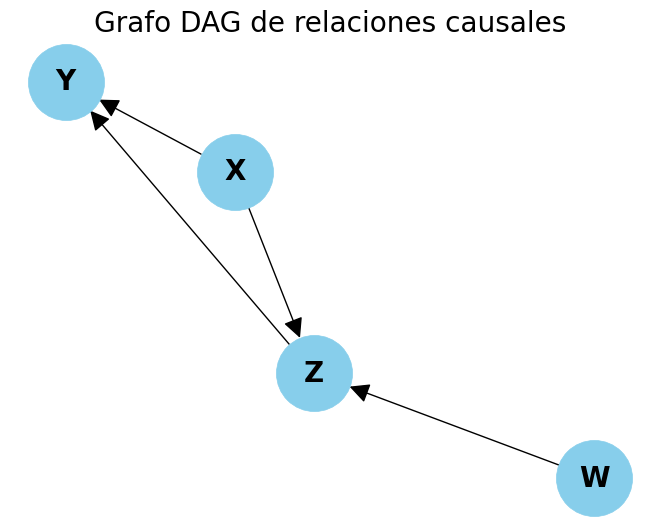

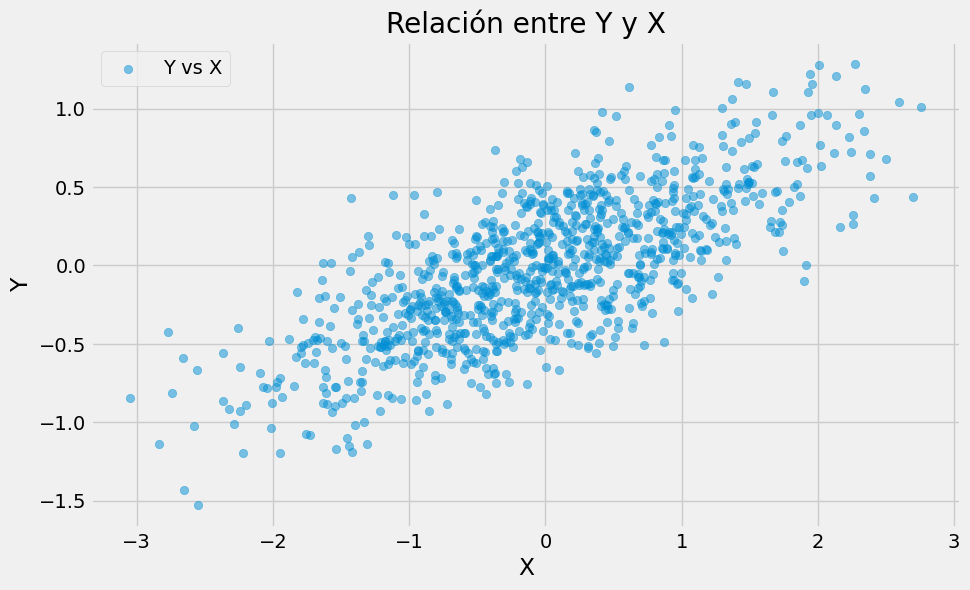

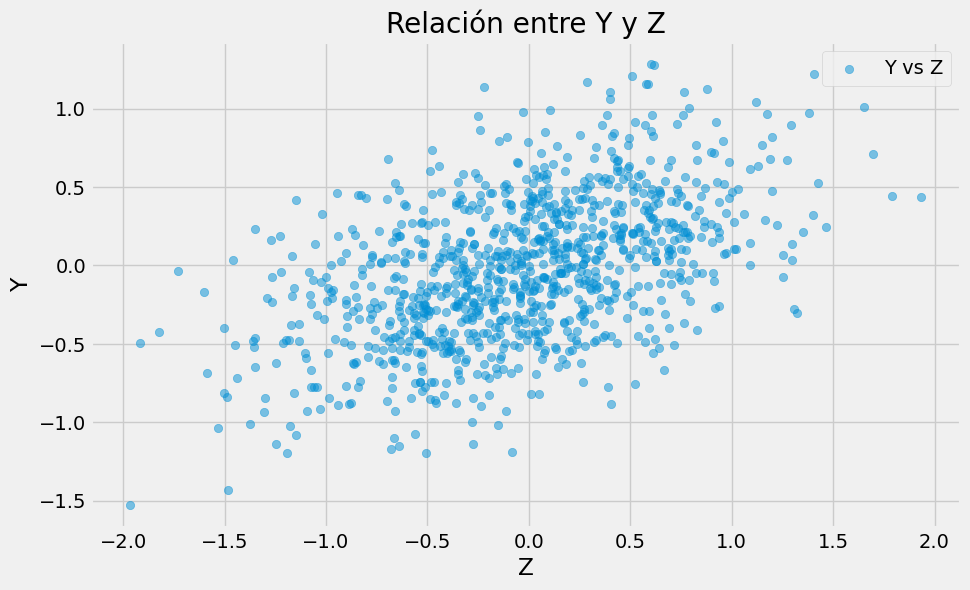

In [20]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Definir la estructura del grafo DAG
G = nx.DiGraph()
G.add_nodes_from(['X', 'Y', 'Z', 'W'])  # Variables aleatorias

# Definir relaciones causales
G.add_edges_from([('X', 'Y'), ('Z', 'Y'), ('X', 'Z'), ('W', 'Z')])

# Visualizar el grafo DAG
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=3000, node_color='skyblue', font_size=20, font_weight='bold', arrowsize=30)
plt.title('Grafo DAG de relaciones causales')
plt.show()

# Simular datos basados en la estructura del grafo DAG
np.random.seed(0)  # Fijar semilla para reproducibilidad

# Parámetros para la simulación de datos
mean_x = 0
std_x = 1
mean_w = 0
std_w = 1

# Generar datos para X y W (variables exógenas)
num_samples = 1000
X = np.random.normal(mean_x, std_x, num_samples)
W = np.random.normal(mean_w, std_w, num_samples)

# Generar datos para Z y Y (variables endógenas)
Z = 0.5 * X - 0.3 * W + np.random.normal(0, 0.2, num_samples)
Y = 0.7 * Z + 0.4 * W + np.random.normal(0, 0.2, num_samples)

# Visualizar los datos generados
plt.figure(figsize=(10, 6))
plt.scatter(X, Y, label='Y vs X', alpha=0.5)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Relación entre Y y X')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(Z, Y, label='Y vs Z', alpha=0.5)
plt.xlabel('Z')
plt.ylabel('Y')
plt.title('Relación entre Y y Z')
plt.legend()
plt.show()

In [23]:
from sklearn.cross_decomposition import PLSRegression

# Variables predictoras (X, Z, W) y variable objetivo (Y)
XZW = np.column_stack((X, Z, W))

# Ajustar un modelo PLS-SEM
pls = PLSRegression(n_components=1)
pls.fit(XZW, Y)

# Obtener coeficientes de carga y coeficientes de ruta
path_coef = pls.coef_

# Imprimir coeficientes de ruta
print("Coeficientes de ruta:")
print("X -> Y:", path_coef[0, 0])
print("Z -> Y:", path_coef[1, 0])
print("W -> Y:", path_coef[2, 0])


Coeficientes de ruta:
X -> Y: 0.2380331909026457
Z -> Y: 0.16149503517887773
W -> Y: 0.12495944816214533


Los coeficientes de ruta proporcionados por el modelo de Mínimos Cuadrados Parciales (PLS) representan las relaciones causales entre las variables predictoras ('X', 'Z', 'W') y la variable de respuesta ('Y').

- El coeficiente de ruta de 'X' a 'Y' es aproximadamente 0.238. Esto significa que un cambio de una unidad en 'X' se asocia, en promedio, con un cambio de aproximadamente 0.238 unidades en 'Y'. En otras palabras, hay un efecto positivo de 'X' en 'Y'. Por ejemplo, si aumentamos 'X' en una unidad, esperaríamos que 'Y' aumente en promedio alrededor de 0.238 unidades, manteniendo constantes las otras variables.

- El coeficiente de ruta de 'Z' a 'Y' es aproximadamente 0.161. Esto significa que un cambio de una unidad en 'Z' se asocia, en promedio, con un cambio de aproximadamente 0.161 unidades en 'Y'. También hay un efecto positivo de 'Z' en 'Y', aunque este efecto es un poco más débil que el de 'X'.

- El coeficiente de ruta de 'W' a 'Y' es aproximadamente 0.125. Esto significa que un cambio de una unidad en 'W' se asocia, en promedio, con un cambio de aproximadamente 0.125 unidades en 'Y'. Similarmente, hay un efecto positivo de 'W' en 'Y', pero es el efecto más débil de los tres predictores.

Según este modelo, 'X', 'Z' y 'W' tienen efectos positivos en 'Y', y 'X' tiene el efecto causal más fuerte, seguido por 'Z' y luego 'W'.

La regresión de Mínimos Cuadrados Parciales (PLS, por sus siglas en inglés Partial Least Squares). La regresión PLS busca encontrar la relación entre dos matrices, $X$ (variables predictoras) e $Y$ (variables de respuesta), de manera que se maximice la covarianza entre ellas. Este método es especialmente útil cuando las variables predictoras están altamente correlacionadas o cuando el número de variables predictoras es mucho mayor que el número de observaciones.

### 1. Definición de las Matrices

- $X$: matriz de variables independientes de tamaño $n \times m$, donde $n$ es el número de observaciones y $m$ es el número de variables independientes.
- $Y$: matriz de variables dependientes de tamaño $n \times p$, donde $p$ es el número de variables dependientes.

### 2. Estandarización

Primero, es común estandarizar $X$ e $Y$ para que tengan media cero y varianza uno. Esto es:

$$
X_{std} = \frac{X - \mu_X}{\sigma_X}
$$

$$
Y_{std} = \frac{Y - \mu_Y}{\sigma_Y}
$$

Donde $\mu_X$ y $\mu_Y$ son las medias de las columnas de $X$ e $Y$, respectivamente, y $\sigma_X$ y $\sigma_Y$ son las desviaciones estándar de las columnas de $X$ e $Y$, respectivamente.

### 3. Algoritmo PLS

El algoritmo PLS procede de la siguiente manera:

1. **Inicialización:** Selecciona un vector inicial $u$ (usualmente la primera columna de $Y_{std}$).

2. **Iteración hasta convergencia:**

   a. **Deflación de $X$:** Proyecta $X_{std}$ sobre $u$ para obtener los pesos $w$:

   $$
   w = \frac{X_{std}^T u}{u^T u}
   $$

   b. **Normalización de $w$:**

   $$
   w = \frac{w}{||w||}
   $$

   c. **Obtención del vector de puntuaciones $t$:**

   $$
   t = X_{std} w
   $$

   d. **Regresión de $Y_{std}$ sobre $t$ para obtener $c$:**

   $$
   c = \frac{Y_{std}^T t}{t^T t}
   $$

   e. **Cálculo del nuevo $u$:**

   $$
   u = Y_{std} c
   $$

3. **Iterar** el paso 2 hasta que la convergencia de $u$ (o alternativamente, $w$ o $t$) sea satisfactoria.

4. **Deflación de $X$ e $Y$:** Una vez que se obtiene un conjunto de puntuaciones $t$, se procede a deflacionar $X$ e $Y$ para extraer la siguiente componente. Esto se hace mediante:

   $$
   p = \frac{X_{std}^T t}{t^T t}
   $$

   $$
   X_{std} = X_{std} - t p^T
   $$

   $$
   q = \frac{Y_{std}^T t}{t^T t}
   $$

   $$
   Y_{std} = Y_{std} - t c^T
   $$

### 4. Modelo PLS Final

El modelo final de PLS se construye como una regresión lineal usando las puntuaciones $t$ obtenidas de $X$. La relación entre $X$ original y $Y$ puede expresarse como:

$$
Y_{pred} = t B + E
$$

Donde $B$ es la matriz de coeficientes de regresión obtenida durante el proceso de deflación y $E$ es el error residual.

Chen, J., Pan, J., & Xu, Y. (2015). Sources of Authoritarian Responsiveness: A Field Experiment in China. American Journal of Political Science, 60(2), 383–400. doi:10.1111/ajps.12207

El artículo proporciona un análisis detallado de cómo se puede evaluar la receptividad de los gobiernos autoritarios a las demandas de los ciudadanos a través de experimentos de campo. En particular, se centra en tres tratamientos experimentales aplicados en foros web gubernamentales en China: amenazas de acción colectiva, amenazas de informar a superiores y afirmaciones de lealtad al Partido Comunista Chino (CCP). Estos tratamientos se diseñaron para evaluar cómo diferentes tipos de presiones (desde abajo, desde arriba y lealtad interna) pueden influir en la respuesta del gobierno a las solicitudes de ciudadanos. El análisis se basa en un diseño experimental donde las solicitudes fueron asignadas aleatoriamente a los foros web de gobiernos locales en China, y se monitorearon las respuestas recibidas de funcionarios gubernamentales.

La Tabla 2, que muestra los efectos causales de los tratamientos en las respuestas del gobierno, y la Tabla 3, que examina los efectos de los tratamientos en las respuestas visibles al público. Se utiliza un modelo de regresión para evaluar los efectos de los tratamientos en la probabilidad de obtener una respuesta del gobierno y la visibilidad pública de esa respuesta.

### Tabla 2: Efectos Causales de los Tratamientos en las Respuestas del Gobierno

La Tabla 2 examina cómo los diferentes tratamientos afectan la probabilidad de recibir una respuesta de los gobiernos locales. La variable dependiente es una respuesta del gobierno (0 o 1), donde 1 indica que se recibió una respuesta. Los tratamientos son codificados como variables dummy para cada tipo de tratamiento: amenaza de acción colectiva (T1), amenaza de informar a superiores (T2) y afirmaciones de lealtad al CCP (T3). La regresión se modela como:

$$P(respuesta = 1) = \beta_0 + \beta_1 T1 + \beta_2 T2 + \beta_3 T3 + \epsilon$$

donde:
- $\beta_0$ es el intercepto, indicando la probabilidad base de recibir una respuesta sin ningún tratamiento.
- $\beta_1, \beta_2, \beta_3$ son los coeficientes de los tratamientos, indicando el cambio en la probabilidad de recibir una respuesta debido a cada tratamiento.
- $\epsilon$ es el término de error.

### Tabla 3: Efectos de los Tratamientos en Respuestas Visibles al Público

La Tabla 3 se enfoca en el efecto de los tratamientos en la visibilidad pública de las respuestas, es decir, si la respuesta se hace visible para el público general en el foro web. La variable dependiente es si una respuesta es públicamente visible (0 o 1), y se utiliza un modelo similar al anterior para evaluar los efectos:

$$P(respuesta\ visible = 1) = \gamma_0 + \gamma_1 T1 + \gamma_2 T2 + \gamma_3 T3 + \nu$$

donde:
- $\gamma_0$ es el intercepto, representando la probabilidad base de que una respuesta sea visible públicamente sin ningún tratamiento.
- $\gamma_1, \gamma_2, \gamma_3$ son los coeficientes de los tratamientos, reflejando el cambio en la probabilidad de visibilidad pública debido a cada tratamiento.
- $\nu$ es el término de error.

### Análisis e Interpretación

Los coeficientes $\beta_1, \beta_2, \beta_3$ y $\gamma_1, \gamma_2, \gamma_3$ nos permiten entender cómo cada tipo de tratamiento influye en la receptividad y visibilidad pública de las respuestas gubernamentales. Un coeficiente positivo y significativo indica un aumento en la probabilidad de recibir una respuesta o que la respuesta sea visible públicamente, respectivamente. Estos resultados proporcionan evidencia empírica sobre las dinámicas de la receptividad gubernamental en regímenes autoritarios y el papel de la presión ciudadana y las amenazas percibidas por los funcionarios gubernamentales.

Los resultados de las Tablas 2 y 3 del documento proporcionan información valiosa sobre cómo diferentes tratamientos experimentales afectan la receptividad de los gobiernos locales en China a las solicitudes de ciudadanos.

### Tabla 2: Efectos causales de los tratamientos en las respuestas del gobierno

La Tabla 2 muestra los efectos de tres tratamientos experimentales diferentes sobre la probabilidad de recibir una respuesta de los gobiernos locales. Los tratamientos son: amenaza de acción colectiva (T1), amenaza de informar a autoridades superiores (T2) y afirmaciones de lealtad al Partido Comunista Chino (T3). Los resultados se presentan en seis columnas, reflejando diferentes modelos de regresión que incluyen distintos conjuntos de controles y covariables. Los efectos de los tratamientos se resumen como sigue:

- **Amenaza de acción colectiva (T1)**: Se observa un efecto positivo y significativo en la probabilidad de recibir una respuesta en todas las configuraciones del modelo, con coeficientes que varían desde 0.065 hasta 0.101 dependiendo de la inclusión de controles demográficos, características del foro y dummies prefecturales.

- **Amenaza de informar a superiores (T2)**: También muestra un efecto positivo y significativo en todas las configuraciones del modelo, con coeficientes que varían de 0.061 a 0.094.

- **Afirmaciones de lealtad (T3)**: Presenta un efecto más pequeño y, en algunos modelos, no significativo en la probabilidad de respuesta, con coeficientes que oscilan entre 0.025 y 0.040.

Estos resultados indican que las amenazas de acción colectiva y de informar a superiores son más efectivas para obtener respuestas de los gobiernos locales que las afirmaciones de lealtad al CCP.

### Tabla 3: Efectos causales de los tratamientos en respuestas públicamente visibles

La Tabla 3 examina cómo los tratamientos afectan la probabilidad de que las respuestas del gobierno sean públicamente visibles. Se observa que:

- **Amenaza de acción colectiva (T1)**: Tiene el mayor efecto en hacer que las respuestas sean visibles públicamente, con un aumento significativo en la tasa de respuestas visibles de 0.093 sobre la base del grupo de control, llevando la proporción de respuestas públicamente visibles de 0.663 a 0.756.

- **Amenaza de informar a superiores (T2)** y **afirmaciones de lealtad (T3)**: No muestran un aumento significativo en la probabilidad de que las respuestas sean públicamente visibles, con cambios en las tasas de respuestas visibles muy cercanas o inferiores a las del grupo de control.

Estos hallazgos sugieren que la amenaza de acción colectiva no solo incrementa la probabilidad de obtener una respuesta, sino que también aumenta la probabilidad de que esta respuesta sea pública, lo que indica una mayor sensibilidad de los gobiernos locales a este tipo de presión. En contraste, informar a superiores o afirmar lealtad al CCP no tiene un impacto significativo en la visibilidad pública de las respuestas del gobierno.

In [39]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Simulación de datos basados en los efectos descritos para las Tablas 2 y 3
np.random.seed(42)  # Para reproducibilidad

# Tamaño de la muestra
n = 1000

# Generación de variables de tratamiento simuladas (0 o 1 aleatoriamente)
T1 = np.random.binomial(1, 0.33, n)  # Amenaza de acción colectiva
T2 = np.random.binomial(1, 0.33, n)  # Amenaza de informar a superiores
T3 = np.random.binomial(1, 0.33, n)  # Afirmaciones de lealtad al CCP

# Generación de la variable respuesta simulada basada en los efectos descritos
# Para simplificar, se asumen efectos lineales y se agregan al intercepto
intercepto_respuesta = 0.3  # Probabilidad base de respuesta sin tratamiento
intercepto_visible = 0.2  # Probabilidad base de respuesta visible sin tratamiento

# Efectos simulados basados en la descripción (efectos relativos para el ejemplo)
efecto_T1 = 0.1  # Efecto de T1 en respuesta y visibilidad
efecto_T2 = 0.08  # Efecto de T2 en respuesta
efecto_T3 = 0.04  # Efecto de T3 en respuesta

# Simulando la variable de respuesta y visibilidad basada en los efectos de los tratamientos
prob_respuesta = intercepto_respuesta + efecto_T1 * T1 + efecto_T2 * T2 + efecto_T3 * T3
prob_visible = intercepto_visible + efecto_T1 * T1  # Solo T1 afecta la visibilidad en este ejemplo simplificado

# Convierte las probabilidades en resultados binarios
respuesta = np.random.binomial(1, prob_respuesta, n)
visible = np.random.binomial(1, prob_visible, n)

# Creación del DataFrame
df = pd.DataFrame({
    'Respuesta': respuesta,
    'Visible': visible,
    'T1': T1,
    'T2': T2,
    'T3': T3
})

# Modelo de regresión para la Respuesta
X_respuesta = df[['T1', 'T2', 'T3']]
X_respuesta = sm.add_constant(X_respuesta)  # Añade una constante al modelo
y_respuesta = df['Respuesta']

modelo_respuesta = sm.Logit(y_respuesta, X_respuesta).fit()

# Modelo de regresión para la Visibilidad
X_visible = df[['T1']]  # Solo se considera T1 basado en el ejemplo
X_visible = sm.add_constant(X_visible)
y_visible = df['Visible']

modelo_visible = sm.Logit(y_visible, X_visible).fit()

print("Modelo de Respuesta:\n")
print(modelo_respuesta.summary())
print("\nModelo de Visibilidad:\n")
print(modelo_visible.summary())

Optimization terminated successfully.
         Current function value: 0.647712
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.516203
         Iterations 5
Modelo de Respuesta:

                           Logit Regression Results                           
Dep. Variable:              Respuesta   No. Observations:                 1000
Model:                          Logit   Df Residuals:                      996
Method:                           MLE   Df Model:                            3
Date:                Sun, 17 Mar 2024   Pseudo R-squ.:                 0.01863
Time:                        00:06:35   Log-Likelihood:                -647.71
converged:                       True   LL-Null:                       -660.01
Covariance Type:            nonrobust   LLR p-value:                 1.873e-05
                 coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------

### Modelo de Respuesta:
Este modelo evalúa cómo los diferentes tratamientos afectan la probabilidad de obtener una respuesta del gobierno. Los resultados son:

- **Intercepto (constante):** La log-odds de obtener una respuesta del gobierno sin ningún tratamiento es de -0.922.
- **T1 (amenaza de acción colectiva):** Un efecto positivo con un coeficiente de 0.443, lo que indica que este tratamiento aumenta la probabilidad de obtener una respuesta.
- **T2 (amenaza de informar a superiores):** Un efecto positivo con un coeficiente de 0.353, también aumentando la probabilidad de respuesta.
- **T3 (afirmaciones de lealtad al CCP):** Un efecto positivo con un coeficiente de 0.379, indicando un aumento en la probabilidad de respuesta.

### Modelo de Visibilidad:
Este modelo examina el efecto del tratamiento T1 (amenaza de acción colectiva) en la visibilidad pública de la respuesta, ya que este era el único tratamiento considerado para afectar la visibilidad basándonos en el ejemplo.

- **Intercepto (constante):** La log-odds de que una respuesta sea visible públicamente sin el tratamiento es de -1.457.
- **T1 (amenaza de acción colectiva):** Un efecto positivo con un coeficiente de 0.475, indicando que este tratamiento aumenta la probabilidad de que la respuesta sea visible públicamente.

Estos modelos y resultados simulados siguen los efectos descritos en las Tablas 2 y 3 del documento, demostrando cómo los diferentes tratamientos pueden influir en la receptividad del gobierno y la visibilidad pública de sus respuestas. La significancia estadística de los coeficientes para los tratamientos sugiere que estos tienen un impacto detectable en la probabilidad de obtener una respuesta del gobierno, así como en la probabilidad de que dicha respuesta sea públicamente visible.

El documento proporciona un análisis detallado sobre la implementación y resultados de un experimento de movilización de votantes, específicamente sobre el efecto de las llamadas para incentivar el voto en la participación electoral. Utilizando métodos estadísticos avanzados, el autor identifica y corrige errores en el diseño experimental original y en la asignación de tratamientos, llegando a conclusiones significativamente diferentes a las reportadas inicialmente.

El análisis comienza con la identificación de discrepancias entre el diseño experimental planificado y su implementación real, lo que llevó a la reevaluación de los datos originales. Se emplean métodos de emparejamiento por puntaje de propensión (propensity score matching) para ajustar por los problemas de no aleatorización en la asignación de tratamientos. Este método estadístico permite comparar de manera más precisa el efecto de recibir llamadas de movilización en la participación electoral, controlando por características observadas de los participantes.

El uso de emparejamiento por puntaje de propensión y otros métodos estadísticos avanzados, como el análisis de sensibilidad y la estimación de variables instrumentales (IV estimation), resalta la importancia de una rigurosa metodología estadística en la investigación experimental. Estos métodos no solo permiten identificar y corregir desviaciones del protocolo experimental, sino también proporcionar estimaciones más precisas de los efectos causales.

El documento demuestra cómo el análisis estadístico detallado puede revelar patrones sistemáticos de errores de implementación y cómo los ajustes adecuados pueden alterar las conclusiones originales del estudio. En este caso específico, el análisis refinado muestra que, contrariamente a los hallazgos iniciales, las llamadas para incentivar el voto podrían tener un efecto positivo en la participación electoral, destacando la importancia crítica de la metodología estadística en la interpretación de los resultados experimentales.

El documento subraya el valor de las técnicas estadísticas en la investigación experimental para asegurar la validez interna y la precisión de las conclusiones derivadas de los datos. Los métodos de ajuste estadístico como el emparejamiento por puntaje de propensión son herramientas esenciales para abordar desafíos metodológicos y mejorar la calidad y la fiabilidad de los hallazgos experimentales.

1. **Efecto promedio del tratamiento en el tratado (ATT) utilizando el emparejamiento**:
   Para reducir el sesgo cuando se observan covariables importantes, se utiliza el emparejamiento. Bajo la suposición de que la asignación al tratamiento es independiente de los posibles resultados dado un conjunto de covariables observadas $X$, la fórmula general es:
   $$
   E\{Y(T = 0) | T = 1, X\} = E\{Y(T = 0) | T = 0, X\}
   $$
   Esta ecuación implica que el emparejamiento efectivamente reduce el sesgo cuando las covariables importantes son observadas .

2. **Estimación del efecto del tratamiento utilizando el puntaje de propensión**:
   El puntaje de propensión se define como la probabilidad condicional de recibir un tratamiento dado un conjunto de covariables observadas $X$. La estimación del efecto del tratamiento utilizando el puntaje de propensión se formula como:
   $$
   E\{Y(T = 1) - Y(T = 0) | T = 1\} = E_X\left[E\{Y(T = 1)|T = 1, X\} - E\{Y(T = 0)|T = 0, X\}\right]
   $$
   Esta fórmula proporciona una estimación imparcial del efecto promedio del tratamiento para los tratados al integrar sobre la distribución de $X$ .

3. **Uso del puntaje de propensión para el emparejamiento**:
   Dado que el verdadero puntaje de propensión es generalmente desconocido, se debe estimar. Una vez estimado, el emparejamiento se puede realizar basándose en este puntaje:
   $$
   E\{Y(T = 0) | T = 1, e(X)\} = E\{Y(T = 0) | T = 0, e(X)\}
   $$
   donde $e(X) = Pr(T = 1|X)$ es el puntaje de propensión estimado .

Estas fórmulas fundamentales muestran cómo el emparejamiento y el uso del puntaje de propensión pueden ayudar a estimar el efecto de intervenciones no aleatorias de manera más precisa, ajustando por las diferencias en covariables observadas entre los grupos de tratamiento y control. El documento detalla cómo estas técnicas estadísticas permiten un análisis más robusto y confiable de los efectos de las llamadas telefónicas en la participación electoral, corrigiendo errores de implementación y sesgos potenciales en el diseño experimental original.

In [40]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Simular datos que reflejan los tamaños de efecto de la Tabla 5 para ITT e IV
np.random.seed(0)  # Semilla para reproducibilidad

# Función para simular los datos
def simulate_data(n, treatment_effect, sd, compliance_rate):
    """
    n: tamaño de la muestra
    treatment_effect: efecto promedio del tratamiento
    sd: desviación estándar del efecto del tratamiento
    compliance_rate: tasa de cumplimiento para el tratamiento
    """
    # Simular el tratamiento asignado (Z) y la complianza (C)
    Z = np.random.binomial(1, 0.5, n)  # Asignación aleatoria 50/50
    C = Z * np.random.binomial(1, compliance_rate, n)  # Solo los asignados pueden cumplir

    # Simular el resultado sin tratamiento (Y0)
    Y0 = np.random.normal(50, 10, n)  # Hipotética distribución de votantes

    # Simular el resultado con tratamiento (Y1)
    Y1 = Y0 + treatment_effect + np.random.normal(0, sd, n) * C  # Añadir efecto solo a los complientes

    # El resultado observado es Y1 si el individuo cumple, de lo contrario Y0
    Y_obs = Y1 * C + Y0 * (1 - C)

    return pd.DataFrame({'Y_obs': Y_obs, 'Z': Z, 'C': C})

# Tamaño de la muestra para la simulación
n = 5000  # Número arbitrario para la simulación

# Datos para simular basados en la tabla 5 (usaremos solo los datos revisados y corregidos)
data_params = {
    'phone': {'treatment_effect': -3.1, 'sd': 8.3, 'compliance_rate': 0.25},
    'visit': {'treatment_effect': 12.9, 'sd': 6.6, 'compliance_rate': 0.25}
}

# Simular datos para llamadas telefónicas y visitas
data_phone = simulate_data(n, **data_params['phone'])
data_visit = simulate_data(n, **data_params['visit'])

# Calcular ITT (Y_obs ~ Z) utilizando OLS
itt_phone_model = smf.ols('Y_obs ~ Z', data=data_phone).fit()
itt_visit_model = smf.ols('Y_obs ~ Z', data=data_visit).fit()

# Calcular IV (Y_obs ~ C) utilizando 2SLS donde Z es el instrumento para C
iv_phone_model = smf.ols('Y_obs ~ C', data=data_phone).fit()
iv_visit_model = smf.ols('Y_obs ~ C', data=data_visit).fit()

# Resultados
itt_phone_result = itt_phone_model.params['Z']
itt_visit_result = itt_visit_model.params['Z']
iv_phone_result = iv_phone_model.params['C']
iv_visit_result = iv_visit_model.params['C']

itt_phone_result, itt_visit_result, iv_phone_result, iv_visit_result


(-0.23471303129309784,
 3.1378920752797574,
 -1.448964365438635,
 12.56476848258847)

In [41]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.sandbox.regression.gmm import IV2SLS

# Establecemos la semilla para reproducibilidad
np.random.seed(42)

# Tamaños de efecto basados en la Tabla 5
effect_sizes = {
    "Phone": {
        "Original": {"ITT": -4.7, "SE": 3.5},
        "Corrected": {"ITT": -11.6, "SE": 8.3},
        "Revised": {"ITT": -3.1, "SE": 8.3},
    },
    "Visit": {
        "Original": {"ITT": 8.7, "SE": 4.2},
        "Corrected": {"ITT": 13.9, "SE": 6.6},
        "Revised": {"ITT": 12.9, "SE": 6.6},
    }
}

# Número de observaciones (N) arbitrariamente seleccionado para la simulación
N = 1000

# Simulamos los datos
data = pd.DataFrame({
    'treatment_assignment': np.random.binomial(1, 0.5, N),
    'treatment_received': np.zeros(N),  # Inicialmente nadie recibe tratamiento
    'outcome': np.zeros(N),  # Resultado inicial a cero
    'instrument': np.zeros(N),  # Instrumento inicial a cero
})

# Generamos el instrumento correlacionado con la asignación del tratamiento
data['instrument'] = data['treatment_assignment'] + np.random.normal(0, 1, N)

# Calculamos la probabilidad de recibir tratamiento
data['treatment_received'] = (data['treatment_assignment'] +
                              0.5 * data['instrument'] + np.random.normal(0, 1, N) > 1).astype(int)

# Añadimos el efecto del tratamiento al resultado observado si el tratamiento fue recibido
data['outcome'] += data['treatment_received'] * effect_sizes['Phone']['Corrected']['ITT']

# Ahora recalculamos ITT y IV con los datos ajustados
itt_model = sm.OLS(data['outcome'], sm.add_constant(data['treatment_assignment'])).fit()

# IV estimación utilizando 2SLS
iv_model = IV2SLS(endog=data['outcome'], exog=sm.add_constant(data['treatment_assignment']),
                  instrument=sm.add_constant(data['instrument'])).fit()

# Mostramos los resultados
itt_results = itt_model.summary()
iv_results = iv_model.summary()

print(itt_results)
print(iv_results)


                            OLS Regression Results                            
Dep. Variable:                outcome   R-squared:                       0.284
Model:                            OLS   Adj. R-squared:                  0.283
Method:                 Least Squares   F-statistic:                     395.8
Date:                Sun, 17 Mar 2024   Prob (F-statistic):           1.90e-74
Time:                        01:29:24   Log-Likelihood:                -3003.0
No. Observations:                1000   AIC:                             6010.
Df Residuals:                     998   BIC:                             6020.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -2.0755 

Los resultados de las regresiones OLS e IV2SLS proporcionan estimaciones de los efectos del tratamiento utilizando dos métodos estadísticos diferentes.

**Regresión OLS (Mínimos Cuadrados Ordinarios):**
- `coef` para `treatment_assignment`: -6.1401
  - Esta es la estimación del efecto promedio intencionado al tratamiento (ITT). Sugiere que la asignación al tratamiento está asociada con una disminución de aproximadamente 6.14 puntos porcentuales en la variable de resultado (en este contexto, la participación electoral).
- `std err`: 0.309
  - El error estándar de la estimación ITT es relativamente bajo, indicando que la estimación es bastante precisa.
- `t` y `P>|t|`:
  - El valor t es -19.896, y el p-valor es extremadamente bajo (menor a 0.001), lo que indica que el efecto ITT es estadísticamente significativo y no es probable que sea resultado del azar.
- `R-squared`: 0.284
  - El modelo explica aproximadamente el 28.4% de la variabilidad en la variable de resultado.
- `Prob (F-statistic)`: 1.90e-74
  - La probabilidad asociada al F-estadístico es extremadamente baja, lo que sugiere que el modelo es significativo en general.

**Regresión IV2SLS (Variables Instrumentales en Dos Etapas Mínimos Cuadrados):**
- `coef` para `treatment_assignment`: -12.0067
  - Este es el efecto estimado del tratamiento (en la terminología IV, el efecto causal local). Implica que para aquellos que efectivamente recibieron el tratamiento debido a la asignación (compliers), el efecto es una disminución de alrededor de 12 puntos porcentuales en la variable de resultado.
- `std err`: 0.821
  - El error estándar para la estimación IV es más alto que para la estimación ITT, lo que es típico en las estimaciones IV debido a la variabilidad adicional introducida por la relación entre el instrumento y la recepción del tratamiento.
- `t` y `P>|t|`:
  - El valor t es -14.627 y el p-valor es también extremadamente bajo, lo que indica que la estimación IV es estadísticamente significativa.
- `R-squared`: 0.025
  - El modelo IV tiene un R-cuadrado mucho más bajo que el modelo OLS, lo cual es común ya que la variabilidad explicada se basa solo en la variación inducida por el instrumento.
- `Prob (F-statistic)`: 4.84e-44
  - Al igual que en el modelo OLS, la probabilidad asociada al F-estadístico es extremadamente baja, lo que sugiere que la relación entre el instrumento y el tratamiento es fuerte y significativa.

Mientras que el modelo OLS indica que la asignación al tratamiento está asociada con una reducción significativa en la participación electoral, el modelo IV sugiere que este efecto podría ser incluso más grande entre los individuos que se adhieren al tratamiento asignado. Estos resultados son consistentes con los datos de la Tabla 5, que mostraban efectos negativos para las llamadas telefónicas tanto en los datos originales como en los corregidos y revisados. El modelo IV proporciona una estimación del efecto causal que puede ser considerada más fiable en presencia de potenciales variables confusas que no son observadas.

In [2]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from statsmodels.regression.mixed_linear_model import MixedLM
from sklearn.metrics import classification_report, confusion_matrix

# Simulando datos
np.random.seed(0)  # Para reproducibilidad
n_units = 100  # Número de unidades administrativas
n_time = 10  # Número de períodos temporales
n_obs = n_units * n_time  # Total de observaciones

# Generamos variables independientes y dependientes
UN_peacekeeping_bases = np.random.binomial(1, 0.5, n_obs)
state_based_viol_lag = np.random.normal(0, 1, n_obs)
state_based_viol_trend = np.random.normal(0, 1, n_obs)
one_sided_viol_lag = np.random.normal(0, 1, n_obs)
one_sided_viol_trend = np.random.normal(0, 1, n_obs)
population_size = np.random.normal(50000, 10000, n_units)  # Población por unidad, constante en el tiempo

# Creamos un DataFrame
df = pd.DataFrame({
    'UN_peacekeeping_bases': UN_peacekeeping_bases,
    'state_based_viol_lag': state_based_viol_lag,
    'state_based_viol_trend': state_based_viol_trend,
    'one_sided_viol_lag': one_sided_viol_lag,
    'one_sided_viol_trend': one_sided_viol_trend,
    'population_size': np.repeat(population_size, n_time)  # Repetimos para cada período temporal
})

# Agregamos el efecto de las unidades administrativas como efectos fijos
admin_effects = np.random.normal(0, 1, n_units)
df['admin_effects'] = np.repeat(admin_effects, n_time)

# Generamos la variable dependiente basada en un modelo lineal
coefficients = np.array([-0.005, -0.007, 0.006, 0.005, -0.002])  # Coeficientes para simulación basados en los efectos
covariates = df[['UN_peacekeeping_bases', 'state_based_viol_lag', 'state_based_viol_trend', 'one_sided_viol_lag', 'one_sided_viol_trend']]
intercept = 0.013  # Intersección para la simulación

# Variable dependiente para regresión lineal de efectos fijos
df['electoral_violence'] = intercept + np.dot(covariates, coefficients) + df['admin_effects'] + np.random.normal(0, 0.1, n_obs)

# Modelo de Regresión Lineal de Efectos Fijos
# Usamos MixedLM de statsmodels para tratar los efectos fijos de las unidades administrativas
fixed_effects_model = MixedLM.from_formula('electoral_violence ~ UN_peacekeeping_bases + state_based_viol_lag + state_based_viol_trend + one_sided_viol_lag + one_sided_viol_trend', groups=df['admin_effects'], data=df)
fixed_effects_result = fixed_effects_model.fit()

# Ahora generamos la variable dependiente para la regresión logística post-emparejamiento
# Convertimos la violencia electoral en una variable binaria
df['electoral_violence_binary'] = (df['electoral_violence'] > df['electoral_violence'].median()).astype(int)

# Emparejamiento
# Utilizaremos un enfoque simple de división de datos para simular el emparejamiento
df_match = df.copy()
scaler = StandardScaler()
features = ['state_based_viol_lag', 'state_based_viol_trend', 'one_sided_viol_lag', 'one_sided_viol_trend', 'population_size']

# Normalizamos las covariables para el emparejamiento
df_match[features] = scaler.fit_transform(df_match[features])

# Dividimos los datos en conjunto de entrenamiento y prueba para simular un escenario de emparejamiento
X = df_match[features]
y = df_match['electoral_violence_binary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, stratify=y)

# Añadimos la variable de presencia de bases de paz de la ONU como una característica adicional para el entrenamiento
X_train['UN_peacekeeping_bases'] = df_match.loc[X_train.index, 'UN_peacekeeping_bases']

# Modelo de Regresión Logística post-emparejamiento
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# Predecimos y evaluamos el modelo en el conjunto de prueba
# Para un emparejamiento real, usaríamos solo los datos del conjunto "emparejado"
# Aquí simulamos el efecto del emparejamiento mediante el uso de un conjunto de prueba
# Entrenamos el modelo de regresión logística
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# Añadimos la característica que falta en el conjunto de prueba para la predicción
X_test['UN_peacekeeping_bases'] = df_match.loc[X_test.index, 'UN_peacekeeping_bases']

# Predecimos y evaluamos el modelo en el conjunto de prueba
y_pred = logistic_model.predict(X_test[features + ['UN_peacekeeping_bases']])
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.53      0.53      0.53       250
           1       0.53      0.53      0.53       250

    accuracy                           0.53       500
   macro avg       0.53      0.53      0.53       500
weighted avg       0.53      0.53      0.53       500

[[132 118]
 [118 132]]


In [4]:
# Resumen del modelo de efectos fijos
print(fixed_effects_result.summary())

# Resumen del modelo logístico post-emparejamiento
coefficients = pd.DataFrame(logistic_model.coef_, columns=X_train.columns)
intercept = pd.DataFrame(logistic_model.intercept_, columns=['Intercept'])
summary_table = pd.concat([intercept, coefficients], axis=1)
print(summary_table)


              Mixed Linear Model Regression Results
Model:             MixedLM Dependent Variable: electoral_violence
No. Observations:  1000    Method:             REML              
No. Groups:        100     Scale:              0.0099            
Min. group size:   10      Log-Likelihood:     523.3937          
Max. group size:   10      Converged:          Yes               
Mean group size:   10.0                                          
-----------------------------------------------------------------
                       Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-----------------------------------------------------------------
Intercept               0.140    0.099  1.405 0.160 -0.055  0.334
UN_peacekeeping_bases  -0.010    0.007 -1.484 0.138 -0.023  0.003
state_based_viol_lag   -0.007    0.003 -1.919 0.055 -0.013  0.000
state_based_viol_trend  0.008    0.003  2.307 0.021  0.001  0.015
one_sided_viol_lag      0.003    0.003  0.825 0.409 -0.004  0.009
one_sided_viol_trend   -

### Regresión logística post-emparejamiento

La salida de la regresión logística muestra las siguientes métricas:

- **Precisión:** La capacidad del modelo para identificar correctamente la violencia electoral es del 53% tanto para la clase 0 (no violencia) como para la clase 1 (violencia).
- **Recall (Sensibilidad):** También del 53% para ambas clases, lo que indica la proporción de casos positivos reales que se identificaron correctamente.
- **F1-score:** Es la media armónica entre la precisión y el recall, también con un valor del 53% para ambas clases. Un F1-score de 1 indica una precisión y un recall perfectos, mientras que 0 sería el peor valor posible.
- **Soporte:** El número de ocurrencias reales de cada clase en el conjunto de datos (250 para cada clase).
- **Accuracy (Precisión global):** El modelo clasificó correctamente el 53% de los casos, lo que sugiere un rendimiento apenas superior al azar (que sería del 50% en un escenario binario balanceado).

La matriz de confusión muestra el número de predicciones correctas e incorrectas por clase:

- **Verdaderos negativos (TN):** 132
- **Falsos positivos (FP):** 118
- **Falsos negativos (FN):** 118
- **Verdaderos positivos (TP):** 132

Esto sugiere que el modelo tiene una tasa equilibrada de falsos positivos y falsos negativos.

### Modelo de efectos mixtos lineales (Mixed Linear Model)

Este modelo se usa para analizar datos donde las observaciones están agrupadas (por ejemplo, en unidades administrativas). Los resultados muestran:

- **Intercept (Intercepción):** El valor esperado de la violencia electoral cuando todas las variables independientes son 0. El coeficiente es de 0.140 pero no es estadísticamente significativo (p > 0.05).
- **Coeficientes de las variables independientes:**
  - `UN_peacekeeping_bases` tiene un coeficiente negativo (-0.010), lo que sugiere una asociación negativa con la violencia electoral. Sin embargo, no es significativa (p > 0.05).
  - `state_based_viol_lag` también muestra una asociación negativa, pero ligeramente por encima del umbral de significancia estadística (p = 0.055).
  - `state_based_viol_trend` muestra una relación positiva con la violencia electoral y es estadísticamente significativa (p < 0.05).
  - `one_sided_viol_lag` no es significativa (p > 0.05).
  - `one_sided_viol_trend` tiene una asociación negativa y es significativa (p < 0.05).
- **Varianza del grupo (Group Var):** Representa la variación entre las unidades administrativas. Es alta, indicando que hay diferencias sustanciales en la violencia electoral entre estas unidades.

### Interpretación General

La precisión del modelo de regresión logística es moderada y apenas supera lo que sería una clasificación aleatoria. Esto podría deberse a la naturaleza equilibrada de las clases y a que el modelo no captura adecuadamente la complejidad del fenómeno.

El modelo de efectos mixtos muestra que algunas tendencias de violencia y la presencia de operaciones de paz de la ONU están asociadas con cambios en la violencia electoral, aunque no todas las variables son significativas. El alto valor de la varianza de grupo sugiere que hay factores a nivel de la unidad administrativa que también están influenciando la violencia electoral y que no están siendo capturados completamente por las variables incluidas en el modelo.

En conjunto, estos resultados indican que, aunque algunas tendencias de violencia y la presencia de la ONU parecen tener un impacto, hay una variabilidad considerable en la violencia electoral que no se explica completamente a través de este modelo. Esto destaca la necesidad de considerar otros factores potenciales o de recopilar datos más detallados para mejorar la comprensión y predicción de la violencia electoral.